# Why use an MCMC to fit polynomials

Answer the question, why should we use Bayesian methods to fit polynomials. This is an entirely reasonable question. So why fit a polynomial to log $\nu$, and $\log S$?  Here is the actual question...

Given that standard polynomial fitting software provides the full correlation matrix -- what is the importance -- or need -- of these Bayesian methods?  In our publications, Bryan Butler and I decided to not publish these numbers, as we felt it was 'too much information', and in any event, the errors are dominated by systematics involved with the fundamental standards, weather, etc.  

We have data which is measured in frequency $\nu$, and flux density $S$. The uncertainties in this data are in units of frequency and flux-density. 

These models are a polynomial fit of spectral flux density, $\log S $, as a function of the logarithm of normalized frequency, $\nu' \equiv \frac{\nu}{\nu_0}$.
$$
    \log S(\nu') = a_0 + a_1 \log(\nu') + a_2 \log(\nu')^2 + \ldots
$$

## Standard Curve Fitting Approach

Standard polynomial fitting software can provide the full correlation matrix. We can use the data from J1939

Text(0, 0.5, 'Flux Density')

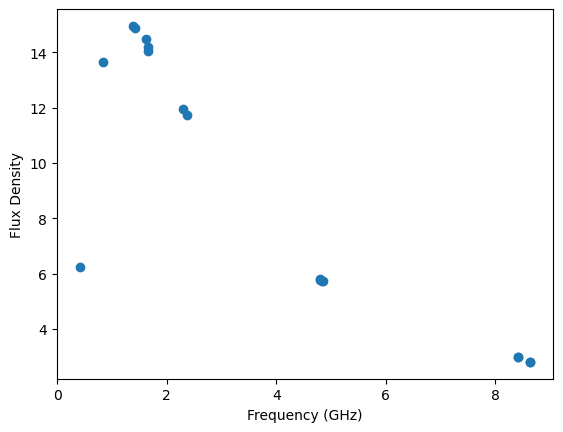

In [1]:
import numpy as np
import matplotlib.pyplot as plt

original_data = np.array(
    [[0.408,  6.24, 0.312 ],
     [0.843, 13.65, 0.6825],
     [1.38 , 14.96, 0.748 ],
     [1.413, 14.87, 0.7435],
     [1.612, 14.47, 0.7235],
     [1.66 , 14.06, 0.703 ],
     [1.665, 14.21, 0.7105],
     [2.295, 11.95, 0.5975],
     [2.378, 11.75, 0.5875],
     [4.8  ,  5.81, 0.2905],
     [4.8  ,  5.76, 0.288 ],
     [4.835,  5.72, 0.286 ],
     [4.85 ,  5.74, 0.287 ],
     [8.415,  2.99, 0.1495],
     [8.42 ,  2.97, 0.1485],
     [8.64 ,  2.81, 0.1405],
     [8.64 ,  2.81, 0.1405]])


#x = original_data[0,:,:]
#
original_data.shape
nu = original_data[:,0]*1e9
S = original_data[:,1]
sigma = original_data[:,2]
plt.plot(nu/1e9,S, 'o')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Flux Density')

[0.02080546 0.33397931 1.6588845  2.97750726 1.76818873]


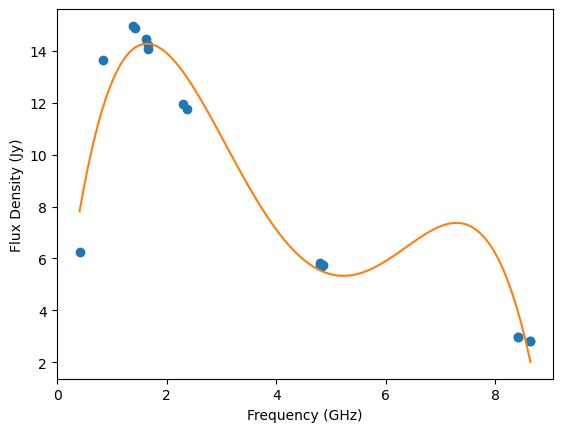

In [2]:
p, cov = np.polyfit(nu/1e9, S, 4, cov=True)
plt.plot(nu/1e9,S, 'o')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Flux Density (Jy)')
freq = np.linspace(np.min(nu), np.max(nu), 100)/1e9
plt.plot(freq, np.polyval(p,freq))
print(np.sqrt(np.diag(cov)))

## Fitting log(nu) and log(S)

[-0.8964881  -0.17078832  0.3220835   0.3457151   0.47747564  0.5068176
  0.50982512  0.83073284  0.8662598   1.56861592  1.56861592  1.57588113
  1.5789787   2.13001583  2.13060983  2.15640258  2.15640258]
[ 0.11431367 -0.71217022  0.23774746  2.69768277]
[[ 5.93036084e-05 -1.42908544e-04 -1.52314650e-05  1.10005191e-04]
 [-1.42908544e-04  3.72617441e-04 -1.27841151e-05 -2.82253633e-04]
 [-1.52314650e-05 -1.27841151e-05  1.13255994e-04 -3.92714318e-05]
 [ 1.10005191e-04 -2.82253633e-04 -3.92714318e-05  3.00261619e-04]]
[0.00770088 0.0193033  0.01064218 0.01732806]


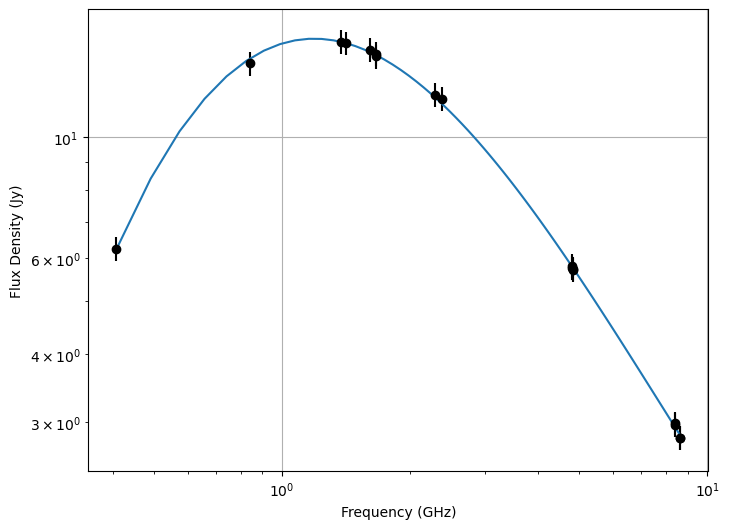

In [36]:
lognu = np.log(nu/1e9)
logS = np.log(S)
print(lognu)

p, cov = np.polyfit(lognu, logS, 3, w=1/sigma, cov=True)

fig, ax0 = plt.subplots(nrows=1, sharex=True, figsize=(8,6))

ax0.set_xscale("log", nonpositive='clip')
ax0.set_yscale("log", nonpositive='clip')
ax0.grid(True)
#ax0.plot(nu/1e9, S, 'o')
ax0.errorbar(nu/1e9, S, yerr=sigma, fmt='ko')
ax0.set_xlabel('Frequency (GHz)')
ax0.set_ylabel('Flux Density (Jy)')
freq = np.linspace(np.min(nu), np.max(nu), 100)/1e9
ax0.plot(freq, np.exp(np.polyval(p,np.log(freq))));

## Checking results against MCMC

The polynomial returned by numpy.polyfit is correct it's coefficients are shown below. Note that these are in reverse order. But they variances agree too

In [37]:
p

array([ 0.11431367, -0.71217022,  0.23774746,  2.69768277])

In [40]:
cov*1e3

array([[ 0.05930361, -0.14290854, -0.01523147,  0.11000519],
       [-0.14290854,  0.37261744, -0.01278412, -0.28225363],
       [-0.01523147, -0.01278412,  0.11325599, -0.03927143],
       [ 0.11000519, -0.28225363, -0.03927143,  0.30026162]])

In [41]:
np.sqrt(np.diag(cov))

array([0.00770088, 0.0193033 , 0.01064218, 0.01732806])

## Answer to Question

Given that standard polynomial fitting software provides the full correlation matrix -- what is the importance -- or need -- of these Bayesian methods?  In our publications, Bryan Butler and I decided to not publish these numbers, as we felt it was 'too much information', and in any event, the errors are dominated by systematics involved with the fundamental standards, weather, etc.

Standard polynomial fitting software can provide a full correlation matrix. We chose to use Bayesian methods which have some advantages. One advantage is that they allow the use of robust likelihoods to manage potential outliers in data, and another advantage is that the posterior probability of the parameters can be plotted, and it is not necessary to assume that it is Gaussian. It should be noted that in most cases the results will be very similar, and other sources of error will typically be more significant than the choice of curve fitting software. 
